In [3]:
import sys
import os
sys.path.append(os.path.abspath("../src"))  # Adds 'src' to the module search path

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot import plot_bar_horizontal,plot_bar_vertical
import numpy as np

# Raw Dataset properties

In [6]:
np.random.seed(42)
HOME_DIR = "../"

In [7]:
df = pd.read_parquet(f"{HOME_DIR}raw_data/80_tasks.parquet",engine="pyarrow")

In [8]:
df[['task_id','filename','dataset','sequence']].nunique()

task_id         80
filename      1329
dataset         29
sequence    691476
dtype: int64

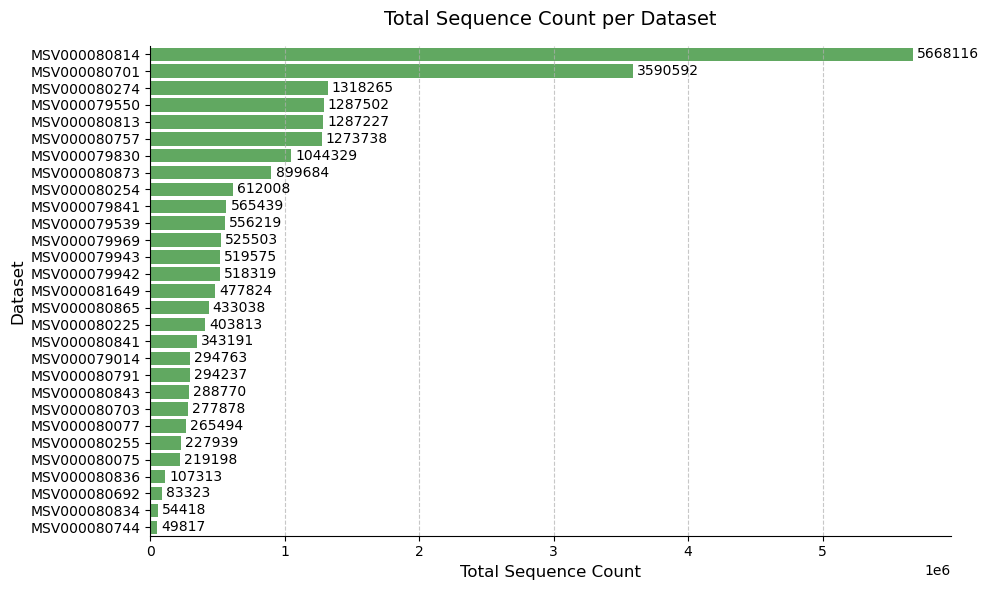

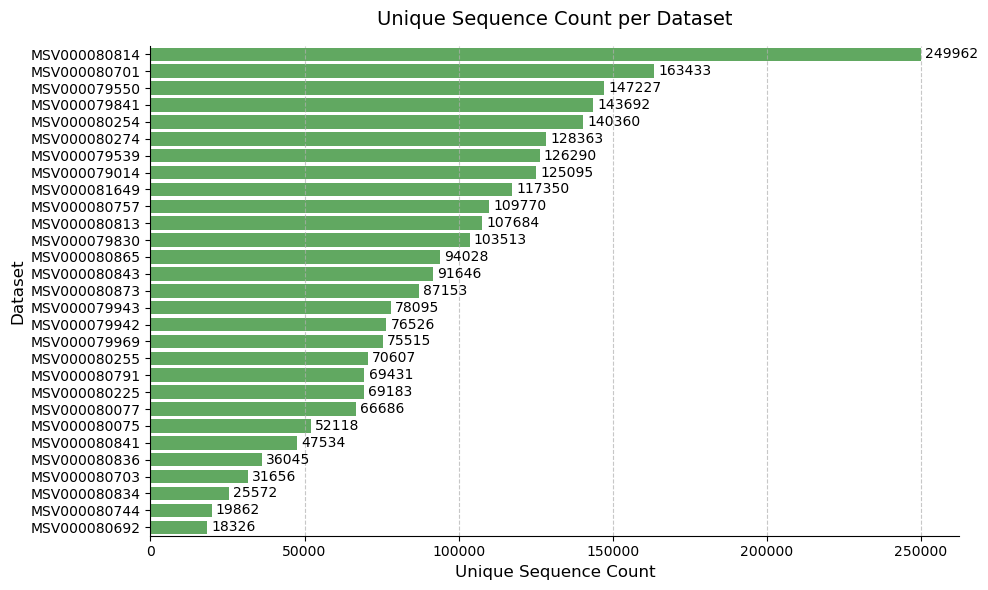

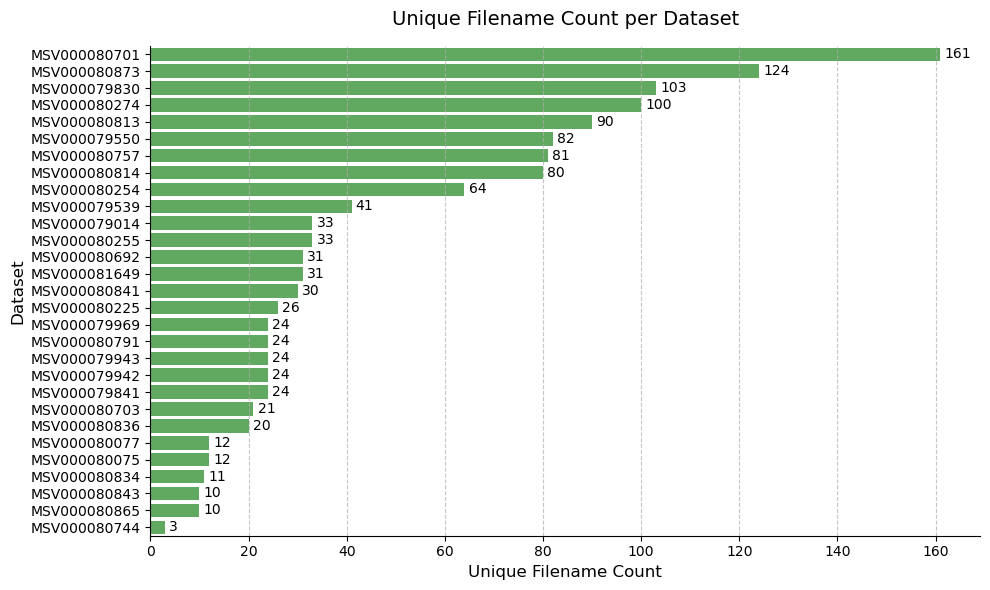

In [9]:
sequences_dataset = df.groupby('dataset')['sequence'].count()
plot_bar_horizontal(
    sequences_dataset,
    xlabel="Total Sequence Count",
    ylabel="Dataset",
    title="Total Sequence Count per Dataset"
)
# 2. Unique sequence counts
unique_sequences_dataset = df.groupby('dataset')['sequence'].nunique()
plot_bar_horizontal(
    unique_sequences_dataset,
    xlabel="Unique Sequence Count",
    ylabel="Dataset",
    title="Unique Sequence Count per Dataset"
)
unique_filenames_dataset = df.groupby('dataset')['filename'].nunique()
plot_bar_horizontal(
    unique_filenames_dataset,
    xlabel="Unique Filename Count",
    ylabel="Dataset",
    title="Unique Filename Count per Dataset"
)

# Data split analysis

In [11]:
DATA = "../data/"

In [25]:
train_df0 = pd.read_parquet(f"{DATA}high_variety/all.parquet",engine="pyarrow")
train_df1 = pd.read_parquet(f"{DATA}low_variety/all.parquet",engine="pyarrow")
val_df = pd.read_parquet(f"{DATA}val.parquet",engine="pyarrow")
test_df = pd.read_parquet(f"{DATA}test.parquet",engine="pyarrow")
train_df = pd.read_parquet(f"{DATA}train.parquet",engine="pyarrow")

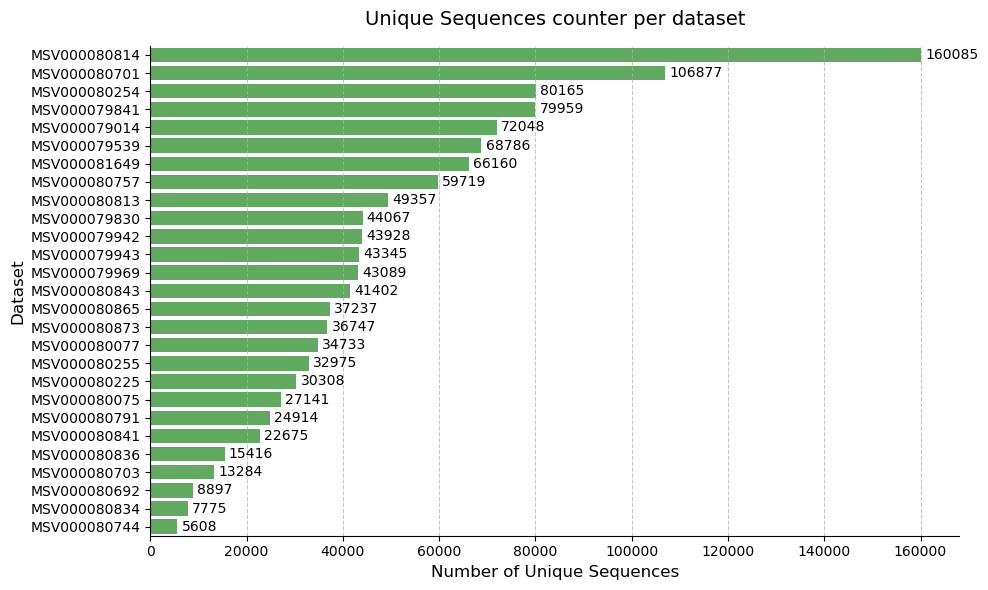

In [33]:
unique_sequences = train_df.groupby("dataset")["sequence"].nunique()
plot_bar_horizontal(
    data_series=unique_sequences,
    title="Unique Sequences counter per dataset",
    xlabel="Number of Unique Sequences",
    ylabel="Dataset",
    figsize=(10, 6)
)

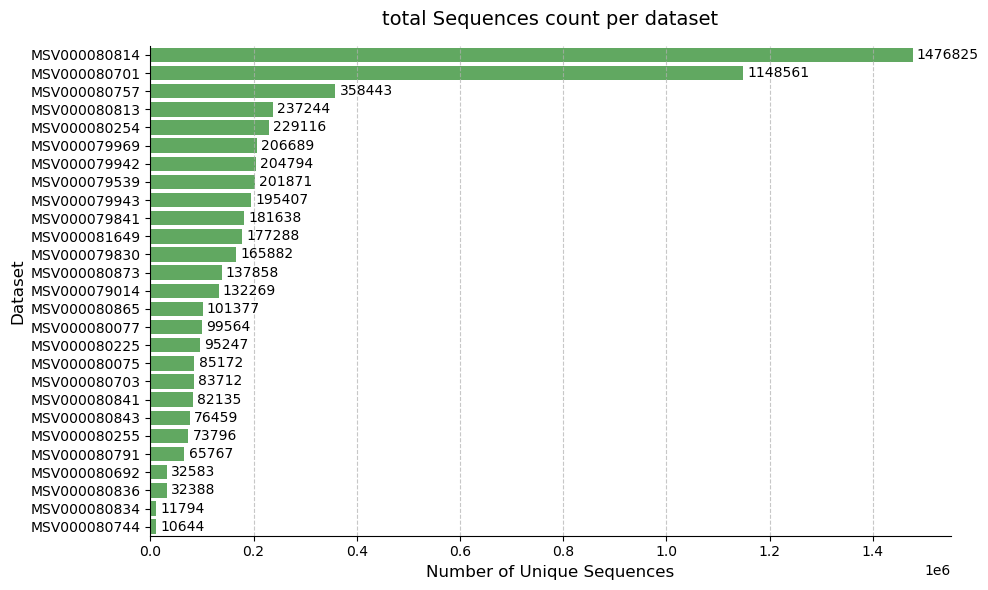

In [37]:
total_sequences = train_df.groupby("dataset")["sequence"].count()
plot_bar_horizontal(
    data_series=total_sequences,
    title="total Sequences count per dataset",
    xlabel="Number of Unique Sequences",
    ylabel="Dataset",
    figsize=(10, 6)
)

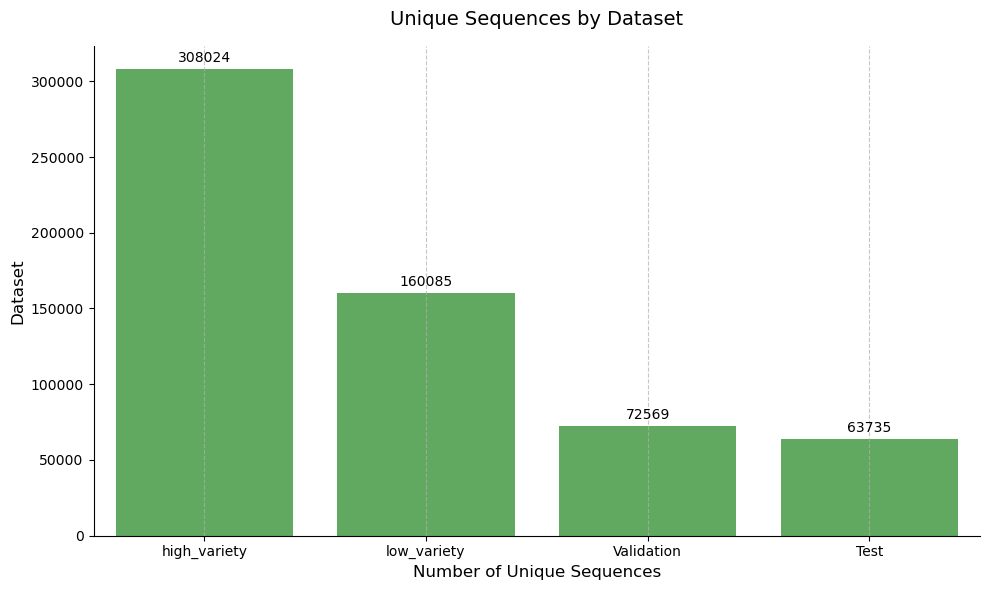

In [23]:
unique_df0_peptides = train_df0["modified_sequence"].nunique()
unique_df1_peptides = train_df1["modified_sequence"].nunique()
unique_val_df_petides = val_df["modified_sequence"].nunique()
unique_test_df_petides = test_df["modified_sequence"].nunique()
# Calculate the lengths of unique peptides for each dataset
unique_counts = pd.Series({
    "high_variety": unique_df0_peptides,
    "low_variety": unique_df1_peptides,
    "Validation": unique_val_df_petides,
    "Test": unique_test_df_petides
})

# Call the plotting function with the Series
plot_bar_vertical(
    data_series=unique_counts,
    title="Unique Sequences by Dataset",
    xlabel="Number of Unique Sequences",
    ylabel="Dataset",
    figsize=(10, 6)
)